# Day 6: Chronal Coordinates

## Parse input and set-up

In [1]:
import itertools
import math

coords = []

# File format: x, y
with open('inputs/6.txt') as f:
    for l in f.readlines():
        inpLine = l.split(', ')
        coord = (int(inpLine[0].strip()), int(inpLine[1].strip()))
        coords.append(coord)

gridWidth = max(coords, key = lambda x: x[0])[0] + 1
gridHeight = max(coords, key = lambda x: x[1])[1] + 1
grid = [[0] * gridHeight for i in range(gridWidth)]

print("Grid size: %d, %d" % (gridWidth, gridHeight))
print("%d input coordinates" % len(coords))

# Pre-place coordinates in the grid
for idx, coord in enumerate(coords):
    grid[coord[0]][coord[1]] = idx

Grid size: 357, 357
50 input coordinates


## Flood-fill the grid

In [2]:
# Manhattan / taxi-cab distance calculation
def manhattan(p1, p2):
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

# Loop each coordinate in the grid and see which point is closest
for x, y in itertools.product(range(gridWidth), range(gridHeight)):
    if (grid[x][y] != 0):
        continue
    
    # Calculate distances to all the input coordinates from this point
    currentCoord = (x, y)
    distances = []
    for idx, center in enumerate(coords):
        distances.append(manhattan(currentCoord, center))
    
    sortedDists = sorted(distances)
    if (sortedDists[0] == sortedDists[1]):
        # Equal distance from two coordinates so no winner
        continue
    
    # Get the index of the lowest element
    closestPointIdx = min(range(len(distances)), key=lambda k: distances[k])
    grid[x][y] = closestPointIdx

## Answer #1

In [3]:
# Pre-calculate the input coords that extend into infinity by tracing the edges
# of the grid. These coords should not be included.
infinitePoints = set()
for i in range(gridWidth):
    infinitePoints.add(grid[i][0])
    infinitePoints.add(grid[i][gridHeight - 1])
for i in range(gridHeight):
    infinitePoints.add(grid[0][i])
    infinitePoints.add(grid[gridWidth - 1][0])

# Calculate the area sizes
areas = [0 for i in range(len(coords))]
for x, y in itertools.product(range(gridWidth), range(gridHeight)):
    pt = grid[x][y]
    if pt not in infinitePoints:
        areas[pt] += 1

# Grab the biggest area size as answer
answer1 = max(areas)
answer1Idx = areas.index(max(areas))
print("Answer #1: %d" % (answer1))

Answer #1: 4166


## Areas visualised

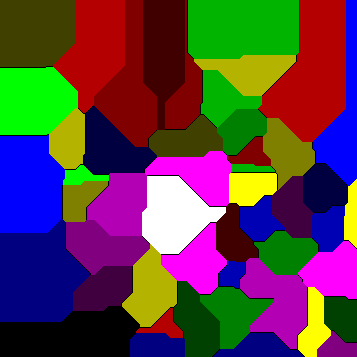

In [4]:
from PIL import Image, ImageColor, ImageDraw
from IPython.display import display

baseColors = [(0,0,255),(0,255,0),(255,255,0),(255,0,255),
              (180,0,0),(0,0,180),(0,180,0),(180,180,0),(180,0,180),
             (128,0,0),(0,0,128),(0,128,0),(128,128,0),(128,0,128),
             (64,0,0),(0,0,64),(0,64,0),(64,64,0),(64,0,64)]

# Assign each input coord a color
pointColors = []
for i in range(len(coords)):
    pointColors.append(baseColors[i % len(baseColors)])

# Answer #1 shows in white
pointColors[answer1Idx] = (255,255,255)

im = Image.new('RGB', (gridWidth, gridHeight), ImageColor.getcolor('black', 'RGB'))
pixels = im.load()

# Color the areas in the image
for x, y in itertools.product(range(gridWidth), range(gridHeight)):
    if grid[x][y] != 0:
        pixels[x, y] = pointColors[grid[x][y]]

display(im)

## Answer #2

In [5]:
answer2 = 0

answer2im = Image.new('RGB', (gridWidth, gridHeight), ImageColor.getcolor('black', 'RGB'))
answer2Pixels = answer2im.load()

# Iterate grid again for answer #2
for x, y in itertools.product(range(gridWidth), range(gridHeight)):
    # Sum up all the distances to this coord
    distTotal = 0
    for coord in coords:
        distTotal += manhattan((x, y), coord)
    
    if distTotal < 10000:
        answer2 += 1
        answer2Pixels[x, y] = (255, 0, 0)

# Show input coordinates in white
for coord in coords:
    answer2Pixels[coord[0], coord[1]] = (255, 255, 255)

print("Answer #2: %d" % answer2)

Answer #2: 42250


## Answer #2 visualised

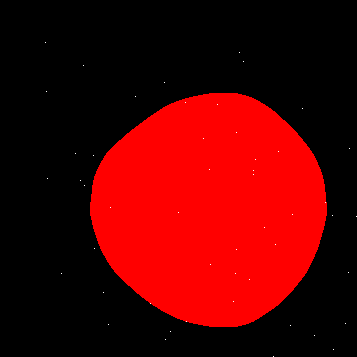

In [6]:
display(answer2im)